# 75.06/95.58 Organización de Datos
# Finger 1: Análisis de datos de eventos en Trocafone


El objetivo de este ejercicio es realizar un muy rápido análisis del set de datos del TP. Es una
buena oportunidad para instalar las herramientas que van a usar para la primera entrega del TP
que consiste en realizar un análisis exploratorio y visualizaciones.



In [6]:
import pandas as pd
import matplotlib   #requerido para color map
import matplotlib.pyplot as plt
import pandas as pd

#Tree Map
import squarify


ModuleNotFoundError: No module named 'squarify'

## Importar los datos al dataframe

#### low_memory : boolean, default True    
Internally process the file in chunks, resulting in lower memory use while parsing, but possibly mixed type inference. To ensure no mixed types either set False, or specify the type with the dtype parameter. Note that the entire file is read into a single DataFrame regardless, use the chunksize or iterator parameter to return the data in chunks. (Only valid with C parser)


In [ ]:
df = pd.read_csv('..\\..\\Data\\tp1\\events.csv', low_memory=False)

## 1) - Analizar cuál es el tipo de evento predominante en el set de datos

La columna 'event' indica el tipo de evento


In [5]:
rankingEventos = df.groupby('event').size().sort_values(ascending=False).to_frame(name='cantidad').reset_index()


NameError: name 'df' is not defined

In [4]:
# colores
cmap = matplotlib.cm.BuGn
mini, maxi = rankingEventos.cantidad.min(), rankingEventos.cantidad.max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in rankingEventos.cantidad]


# labels
labels = ["%s\n%d" % (label) for label in zip(rankingEventos.event, rankingEventos.cantidad)]

# plot treemap
fig = plt.figure(figsize=(12, 10),facecolor='lightgoldenrodyellow')
fig.suptitle("Eventos por tipo - Trocafone Web Analytics", fontsize=20)
ax = fig.add_subplot() #111, aspect="equal"
ax = squarify.plot(rankingEventos.cantidad, color=colors, label=labels, ax=ax, alpha=.6 )

ax.set_title("\nCantidad por tipo de evento\n", fontsize=14)


# Barra de escala
fig.text(.76, .9, "Escala", fontsize=14)
img = plt.imshow([rankingEventos.cantidad], cmap=cmap, alpha=.6)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.98)
ax.set_xticks([])
ax.set_yticks([])

# Footer
fig.text(.5, -0.005, "Total de eventos registrados: %d" % (rankingEventos.cantidad.sum()), fontsize=14, ha="center")

plt.show()

rankingEventos

NameError: name 'rankingEventos' is not defined

## 2) - Calcular cuales son los 5 productos (identificados por sku) con mayor cantidad de conversiones.

In [5]:
top5sku=df[df['event'] == 'conversion'].groupby('sku').size().sort_values(ascending=False).head(5).sort_values().to_frame(name='cantidad').reset_index()

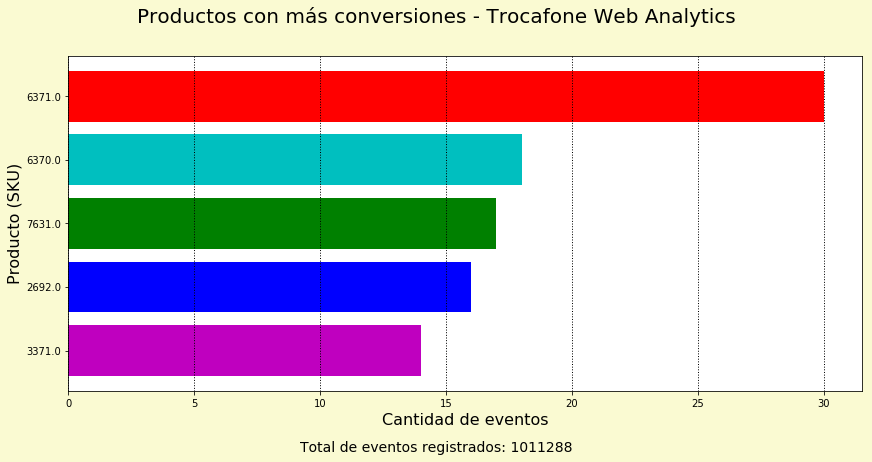

,sku,cantidad
0,3371.0,14
1,2692.0,16
2,7631.0,17
3,6370.0,18
4,6371.0,30


In [6]:
# plot

colors = ['m', 'b', 'g', 'c', 'r'] #, 'y', 'g'

fig = plt.figure(figsize=(12, 6),facecolor='lightgoldenrodyellow', constrained_layout=True )
ax = fig.add_subplot(111)
ax.grid(color='k', linestyle=':', linewidth=1, axis='x')

fig.suptitle("Productos con más conversiones - Trocafone Web Analytics\n", fontsize=20)
ax.barh(top5sku.sku, top5sku.cantidad, color=colors)
plt.ylabel('Producto (SKU)' , fontsize=16)
plt.xlabel('Cantidad de eventos' , fontsize=16)


# Footer
fig.text(.5, -0.05, "\nTotal de eventos registrados: %d" % (rankingEventos.cantidad.sum()), fontsize=14, ha="center")
plt.show()

#Muestra el dataframe
top5sku

# 3) - Averiguar cuáles son los 10 usuarios que registraron más actividad en la plataforma (es decir, realizaron más eventos).

In [7]:
top10Person = df.groupby('person').size().sort_values(ascending=False).head(10).sort_values().to_frame(name='cantidad').reset_index()

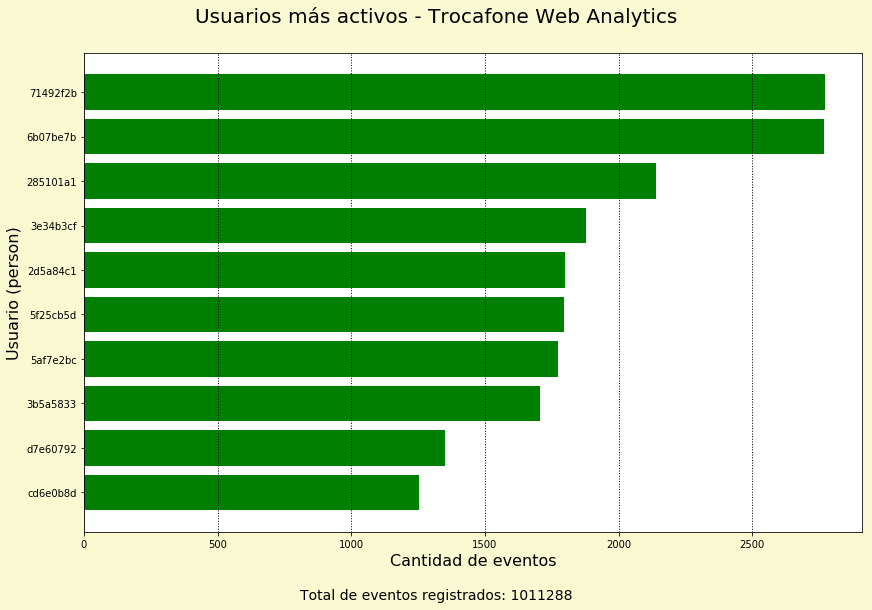

,person,cantidad
0,cd6e0b8d,1254
1,d7e60792,1352
2,3b5a5833,1705
3,5af7e2bc,1773
4,5f25cb5d,1797
5,2d5a84c1,1800
6,3e34b3cf,1877
7,285101a1,2140
8,6b07be7b,2770
9,71492f2b,2771


In [8]:


# plot
fig = plt.figure(figsize=(12, 8), facecolor='lightgoldenrodyellow', constrained_layout=True)
ax = fig.add_subplot(111)
ax.grid(color='k', linestyle=':', linewidth=1, axis='x')

fig.suptitle("Usuarios más activos - Trocafone Web Analytics\n", fontsize=20)
ax.barh(top10Person.person, top10Person.cantidad ,color='G')
plt.ylabel('Usuario (person)' , fontsize=16)
plt.xlabel('Cantidad de eventos' , fontsize=16)

# Footer
fig.text(.5, -0.05, "\nTotal de eventos registrados: %d" % (rankingEventos.cantidad.sum()), fontsize=14, ha="center")
plt.show()

#Muestra el dataframe
top10Person
